# Autocorrelation for Glauber dynamics on homogeneous graph

In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, Plots, Printf, Statistics, ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [2]:
T = 5
N = 10
k = 3
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
p⁰ = fill([0.75, 0.25], N)

gl = Glauber(Ising(g), T; p⁰);

In [3]:
bp = mpbp(gl)
cb = CB_BP(bp);

In [4]:
svd_trunc = TruncBond(4)
iters, cb = iterate!(bp, maxiter=200; svd_trunc, cb, tol=1e-3)
@show iters
b_bp = beliefs(bp)
m_bp = [[bbb[1]-bbb[2] for bbb in bb] for bb in b_bp];

Running MPBP: iter 2 	 Time: 0:00:18
  Δ:  0.26678665578032607

iters = 9


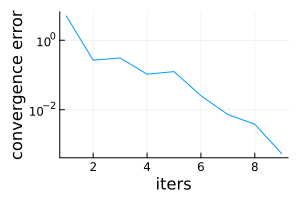

In [5]:
plot(cb.Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [6]:
ns = 10^5
sms = sample(bp, ns)
b_mc = marginals(sms)
m_mc = [[bbb[1]-bbb[2] for bbb in bb] for bb in b_mc];

SoftMargin sampling 100%|████████████████████████████████| Time: 0:00:02


Max matrix size: 4x4


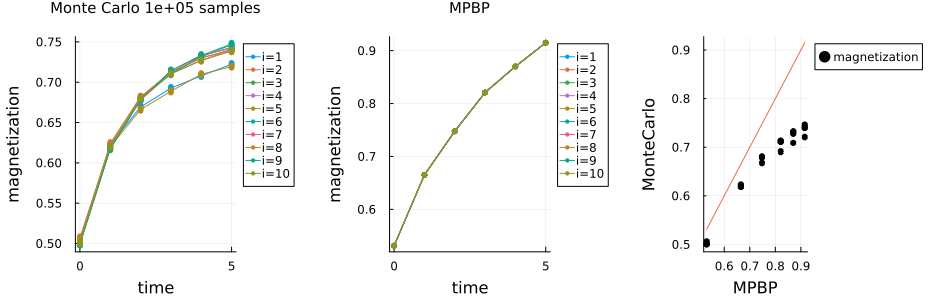

In [7]:
title = @sprintf "Monte Carlo %.0e samples" ns
pl_mc = plot(xlabel="time", ylabel="magnetization", xticks=0:5:T, title=title)
for i in 1:N
    plot!(pl_mc, 0:T, m_mc[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
pl_bp = plot(xlabel="time", ylabel="magnetization", xticks=0:5:T, title="MPBP")
for i in 1:N
    plot!(pl_bp, 0:T, m_bp[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
pl_sc = scatter(reduce(vcat, m_bp), reduce(vcat, m_mc), xlabel="MPBP", ylabel="MonteCarlo", 
    label="magnetization", ms=3, c=:black, legend=:outertopright)
plot!(identity, label="", size=(300,300))
println("Max matrix size: ", svd_trunc.mprime, "x", svd_trunc.mprime)
plot(pl_mc, pl_bp, pl_sc, titlefontsize=10, size=(950, 300), legend=:outertopright, 
    margin=5Plots.mm, layout=(1,3))

In [23]:
using ColorSchemes
i = 3
ci = c[i]
us = 2:6:(T-1)
cg = cgrad(:matter, length(us), categorical=true)
pl = plot(xlabel="u-t", ylabel="correlation", legend=:outertopright)
for (j,u) in enumerate(us)
    plot!(pl, 1:u-1, ci[2:u,u+1], label="u=$u", m=:o, c=cg[j]) 
end
pl

LoadError: ArgumentError: range(0.0, stop=1.0, length=1): endpoints differ